In [20]:
# Set up stlab
from pyplr import stlab
d = stlab.SpectraTuneLab(password='2294b16eea08a15a')
d.turn_off()

LIGHT HUB login success
User authenticated as: admin
The following addresses are defined: [1, 1004, 1023]
Call get_luminaires() / get_device_info() for more info


<Response [200]>

In [21]:
from time import sleep
from pyplr.pupil import PupilCore

p = PupilCore()

p.command('R our_recording')

sleep(1)

p.command('r')

'OK'

In [22]:
p.check_3d_model()

> Refit the 3d model? [y/n]:  y


> Unfreezing 3d model for eye 0
> Unfreezing 3d model for eye 1
> Ask the participant to roll their eyes


> Press "Enter" when ready to freeze the model:  


> Freezing 3d model for eye 0
> Freezing 3d model for eye 1


In [23]:
p = PupilCore()
pgr_future = p.pupil_grabber(topic='pupil.1.3d', seconds=5)

> Grabbing 5 seconds of pupil.1.3d


In [24]:
data = pgr_future.result()
data[0]

> PupilGrabber done grabbing 5 seconds of pupil.1.3d


{'id': 1,
 'topic': 'pupil.1.3d',
 'method': 'pye3d 0.3.0 real-time',
 'norm_pos': [0.2662842007000473, 0.6041542204289796],
 'diameter': 59.32567578630772,
 'confidence': 1.0,
 'timestamp': -908071.259545,
 'sphere': {'center': [1.429735509800402,
   3.0217243753823246,
   39.66478700349198],
  'radius': 10.392304845413264},
 'projected_sphere': {'center': [106.0544045234257, 117.46428338504523],
  'axes': [177.64990882346808, 177.64990882346808],
  'angle': 0.0},
 'circle_3d': {'center': [-4.668612682816481,
   -1.9149969787428174,
   32.850175378950844],
  'normal': [-0.5868138284365708, -0.4750362337863874, -0.6557363093085966],
  'radius': 2.9874511060558486},
 'diameter_3d': 5.974902212111697,
 'ellipse': {'center': [51.126566534409086, 76.00238967763593],
  'axes': [37.89855209746802, 59.32567578630772],
  'angle': 37.78372885560624},
 'location': [51.126566534409086, 76.00238967763593],
 'model_confidence': 1.0,
 'theta': 2.065801534391288,
 'phi': -2.3007827020058103}

Text(0.5, 0, 'Pupil timestamp (s)')

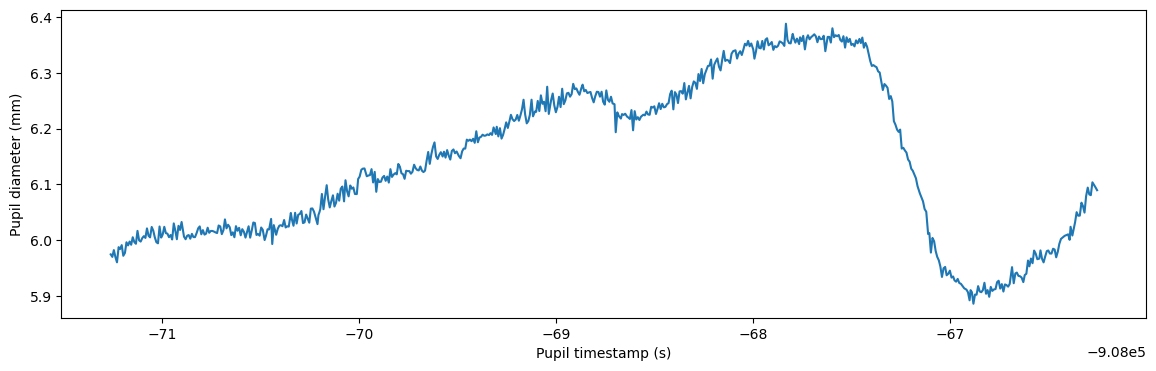

In [25]:
import matplotlib.pyplot as plt
from pyplr.utils import unpack_data_pandas

data = unpack_data_pandas(data, cols=['timestamp','diameter_3d'])
ax = data['diameter_3d'].plot(figsize=(14,4))
ax.set_ylabel('Pupil diameter (mm)')
ax.set_xlabel('Pupil timestamp (s)')